## Circuits on Qiskit backends

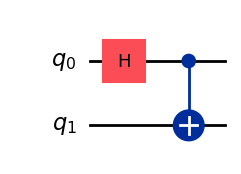

In [1]:
#okay, lets try now how it is implemented in a real quantum computer
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import Statevector, DensityMatrix
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
qc.cx(0, 1)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
#qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.

qc.draw('mpl')

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = service = QiskitRuntimeService(channel="ibm_quantum",token='25194c5cf4e56883a8579c4144e99b687733d05ce48ccd8619534df794c7e6681456c62c237edeb2d44a3a9022351894961f19c58d3eb9b4c549e6f3059a005d')
 
backend = service.backend('ibm_sherbrooke')
print(f'Using backend: {backend.name}')


Using backend: ibm_sherbrooke


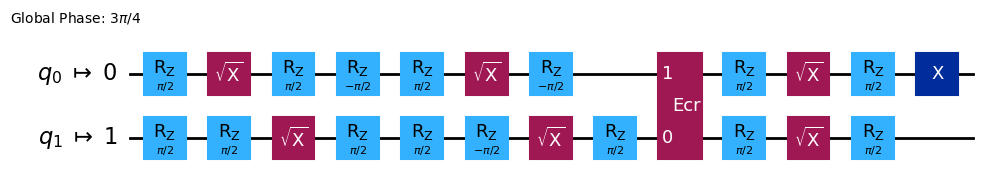

In [4]:

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=0)
isa_circuit_0 = pm.run(qc)
 
isa_circuit_0.draw("mpl", idle_wires=False)


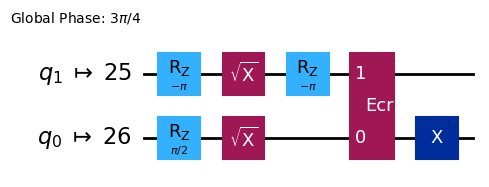

In [6]:
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=2)
isa_circuit_2 = pm.run(qc)
 
isa_circuit_2.draw("mpl", idle_wires=False)

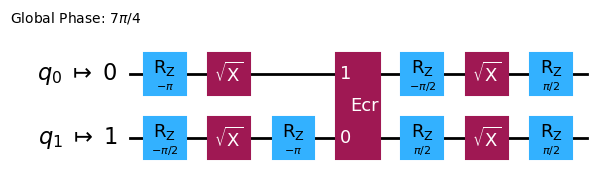

In [57]:
isa_circuit_1.draw("mpl", idle_wires=False)

In [99]:
operations_opt_1=[]
for element in isa_circuit_1.data:
    operations_opt_1.append(element.matrix)
    

In [96]:
states_opt_1=np.zeros((isa_circuit_1.depth()+1,4),dtype=complex)

#Slide 1
states_opt_1[0]=[1,0,0,0]

#Slide 2
states_opt_1[1]=np.matmul(np.kron(operations_opt_1[2],operations_opt_1[0]),states_opt_1[0])

#Slide 3
states_opt_1[2]=np.matmul(np.kron(operations_opt_1[3],operations_opt_1[1]),states_opt_1[1])

#Slide 4
states_opt_1[3]=np.matmul(np.kron(operations_opt_1[4],np.eye(2,dtype=complex)),states_opt_1[2])

#Slide 5
states_opt_1[4]=np.matmul(operations_opt_1[5],states_opt_1[3])

#Slide 5
states_opt_1[5]=np.matmul(np.kron(operations_opt_1[9],operations_opt_1[6]),states_opt_1[4])

#Slide 5
states_opt_1[6]=np.matmul(np.kron(operations_opt_1[10],operations_opt_1[7]),states_opt_1[5])

#Slide 6
states_opt_1[7]=np.matmul(np.kron(operations_opt_1[11],operations_opt_1[8]),states_opt_1[6])



In [12]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=0)

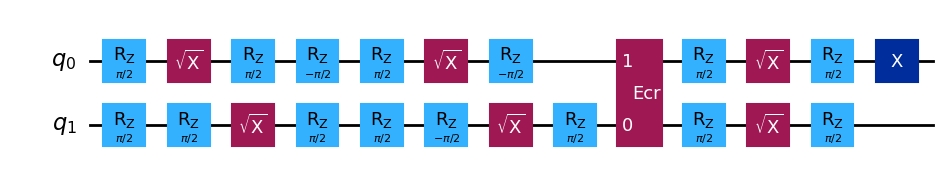

In [55]:
test_circ_0.draw('mpl')

In [621]:
#Optimzation level 0

# Convert to an ISA circuit and layout-mapped observables.

pm = generate_preset_pass_manager(backend=backend, optimization_level=0)
isa_circuit_0 = pm.run(qc)

#Extract set of instructions from transpiled circuit

operations_opt_0=[] #array with operations
dims_opt_0=[] # dimension of each operation (2 for local, 4 for bipartite)

#Saving all operations and dimensions in two arrays
for element in isa_circuit_0.data:
    operations_opt_0.append(element.matrix)
    dims_opt_0.append(element.matrix.shape[0])

#Determine how many operation are perfomed until ecr (the index of ecr tells us how many operations were done before)
where_ecr=np.where(np.array(dims_opt_0) == 4)[0][0]

# Correction on ECR gate 
operations_opt_0[where_ecr]=(1 / np.sqrt(2)) * np.array([ [0, 0, 1, 1j], [0, 0, 1j, 1],  [1, -1j, 0, 0], [-1j, 1, 0, 0]], dtype=complex)


#Set of quantum states for the native gates path from init state to final state

states_opt_0=np.zeros((isa_circuit_0.depth()+1,4),dtype=complex)

global_phase=1j*3*np.pi/4 #global phase induced on tranpile process

states_opt_0[0]=np.exp(global_phase)*np.array([1,0,0,0],dtype=complex) # Initial state

#Apply layers before ecr gate, for each layer we store the quantum state vector
for layer in range(0,where_ecr//2):
    states_opt_0[layer+1]=np.matmul(np.kron(operations_opt_0[layer+where_ecr//2],operations_opt_0[layer]),states_opt_0[layer])
    #print(layer, layer+where_ecr//2)


states_opt_0[where_ecr//2+1]=np.matmul(np.kron(operations_opt_0[where_ecr-1],np.eye(2,dtype=complex)),states_opt_0[where_ecr//2]) #good up to here
states_opt_0[where_ecr//2+2]=np.matmul(operations_opt_0[where_ecr],states_opt_0[where_ecr//2+1]) 

for layer in range(where_ecr//2+1,isa_circuit_0.depth()-2):
    states_opt_0[layer+2]=np.matmul(np.kron(operations_opt_0[layer+where_ecr//2+5],operations_opt_0[layer+where_ecr//2+1]),states_opt_0[layer+1])
    #print(layer+where_ecr//2+1,layer+where_ecr//2+5)
    #print(layer+2)

states_opt_0[-1]=np.matmul(np.kron(np.eye(2,dtype=complex),operations_opt_0[where_ecr+4]),states_opt_0[-2])


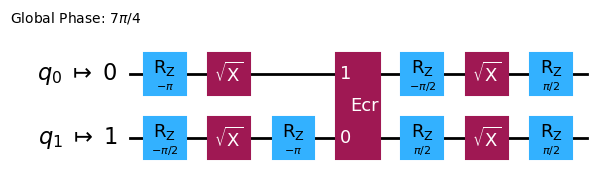

In [599]:

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit_1 = pm.run(qc)
 
isa_circuit_1.draw("mpl", idle_wires=False)

In [604]:
#Optimzation level 1

# Convert to an ISA circuit and layout-mapped observables.

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit_1 = pm.run(qc)

#Extract set of instructions from transpiled circuit

operations_opt_1=[] #array with operations
dims_opt_1=[] # dimension of each operation (2 for local, 4 for bipartite)

#Saving all operations and dimensions in two arrays
for element in isa_circuit_1.data:
    operations_opt_1.append(element.matrix)
    dims_opt_1.append(element.matrix.shape[0])

#Determine how many operation are perfomed until ecr (the index of ecr tells us how many operations were done before)
where_ecr=np.where(np.array(dims_opt_1) == 4)[0][0]

# Correction on ECR gate 
operations_opt_1[where_ecr]=(1 / np.sqrt(2)) * np.array([ [0, 0, 1, 1j], [0, 0, 1j, 1],  [1, -1j, 0, 0],   [-1j, 1, 0, 0]], dtype=complex)

#Set of quantum states for the native gates path from init state to final state

states_opt_1=np.zeros((isa_circuit_1.depth()+1,4),dtype=complex)

global_phase=1j*7*np.pi/4 #global phase induced on tranpile process

states_opt_1[0]=np.exp(global_phase)*np.array([1,0,0,0],dtype=complex) # Initial state

#Apply layers before ecr gate, for each layer we store the quantum state vector
for layer in range(0,where_ecr//2):
    states_opt_1[layer+1]=np.matmul(np.kron(operations_opt_1[layer+where_ecr//2],operations_opt_1[layer]),states_opt_1[layer])
    #print(layer, layer+where_ecr//2)


states_opt_1[where_ecr//2+1]=np.matmul(np.kron(operations_opt_1[where_ecr-1],np.eye(2,dtype=complex)),states_opt_1[where_ecr//2]) #good up to here
states_opt_1[where_ecr//2+2]=np.matmul(operations_opt_1[where_ecr],states_opt_1[where_ecr//2+1]) 

for layer in range(where_ecr//2+1,isa_circuit_1.depth()-1):
    states_opt_1[layer+2]=np.matmul(np.kron(operations_opt_1[layer+where_ecr//2+4],operations_opt_1[layer+where_ecr//2+1]),states_opt_1[layer+1])
    #print(layer+where_ecr//2+1,layer+where_ecr//2+4)
    #print(layer+2)

#states_opt_1[-1]=np.matmul(np.kron(np.eye(2,dtype=complex),operations_opt_1[where_ecr+4]),states_opt_1[-2])


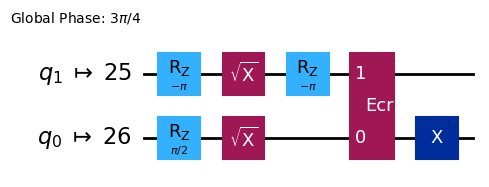

In [387]:
isa_circuit_2.draw("mpl", idle_wires=False)

In [631]:
#Optimzation level 2

# Convert to an ISA circuit and layout-mapped observables.

pm = generate_preset_pass_manager(backend=backend, optimization_level=2)
isa_circuit_2 = pm.run(qc)

#Extract set of instructions from transpiled circuit

operations_opt_2=[] #array with operations
dims_opt_2=[] # dimension of each operation (2 for local, 4 for bipartite)

#Saving all operations and dimensions in two arrays
for element in isa_circuit_2.data:
    operations_opt_2.append(element.matrix)
    dims_opt_2.append(element.matrix.shape[0])

#Determine how many operation are perfomed until ecr (the index of ecr tells us how many operations were done before)
where_ecr=np.where(np.array(dims_opt_1) == 4)[0][0]

# Correction on ECR gate 
operations_opt_2[where_ecr]=(1 / np.sqrt(2)) * np.array([ [0, 0, 1, 1j], [0, 0, 1j, 1],  [1, -1j, 0, 0], [-1j, 1, 0, 0]], dtype=complex)

#Set of quantum states for the native gates path from init state to final state

states_opt_2=np.zeros((isa_circuit_2.depth()+1,4),dtype=complex)

global_phase=1j*3*np.pi/4 #global phase induced on tranpile process

states_opt_2[0]=np.exp(global_phase)*np.array([1,0,0,0],dtype=complex) # Initial state

#Apply layers before ecr gate, for each layer we store the quantum state vector
for layer in range(0,where_ecr//2):
    states_opt_2[layer+1]=np.matmul(np.kron(operations_opt_2[layer+where_ecr//2+1],operations_opt_2[layer]),states_opt_2[layer])
    #print(layer, layer+where_ecr//2+1)

#print(where_ecr//2+2)
states_opt_2[where_ecr//2+1]=np.matmul(np.kron(np.eye(2,dtype=complex),operations_opt_2[2]),states_opt_2[where_ecr//2]) #good up to here
states_opt_2[where_ecr//2+2]=np.matmul(operations_opt_2[5],states_opt_2[where_ecr//2+1]) #Good up to here

states_opt_2[5]=np.matmul(np.kron(operations_opt_2[6],np.eye(2,dtype=complex)),states_opt_2[4])

## For pure states only:

In [633]:
def distance_FB(psi : np.array, phi : np.array) -> float:
    """
    Computes the distance between two states using the Fubini-Study metric.
    psi: np.array is a state vector
    phi: np.array is a state vector

    return:
    d_FS: float, the distance between the two states
    given by the Fubini-Study Metric
    """

    # Ensure the states are normalize

    # Compute the inner product
    abs_inner_product = np.abs(np.vdot(psi, phi)) 

    # Compute the Fubini-Study distance
    d_FS = np.sqrt(np.abs(2 - 2 * abs_inner_product))
    return d_FS


def geodesic_distance_pure_states(psi : np.array, phi : np.array) -> float:
    real_part =  np.real(np.vdot(psi, phi))
    theta = np.arccos(real_part)
    return theta



def psi_dot(psi : np.array, phi : np.array) -> np.array:
    """
    Computes the tangent/velocity statevector at the CH space
    psi: np.array is a state vector
    phi: np.array is a state vector

    return:
    psi_dot: tangent vector between the two states
    """
    theta = geodesic_distance_pure_states(psi, phi)
    sin_theta, cos_theta = np.sin(theta), np.cos(theta)
    psi_dot = ( phi - cos_theta * psi ) / sin_theta
    return psi_dot

def geodesic_two_states(psi : np.array, phi : np.array, tau : float) -> np.array:
    """
    Computes the geodesic between two states psi and phi
    psi: np.array is a state vector
    phi: np.array is a state vector
    zeta: float, parameter of the geodesic

    return:
    psi_zeta: np.array, the geodesic state at parameter zeta
    """

    # Compute the inner product

    sin_tau, cos_tau = np.sin(tau), np.cos(tau)
    psi_dot_geo = psi_dot(psi, phi)

    return cos_tau * psi + sin_tau * psi_dot_geo

In [634]:
ket_zero = np.array([1, 0])
ket_plus = np.array([1, 1]) / np.sqrt(2)

ket_zerozero = np.array([1, 0, 0, 0])
ket_bell = np.array([1, 0, 0, 1]) / np.sqrt(2)

def geodesic_zero_plus_FS(tau):
    return geodesic_two_states(ket_zero, ket_plus, tau)


def geodesic_zerozero_bell_FS(tau):
    return geodesic_two_states(ket_zerozero, ket_bell, tau)


geo_distance_zero_plus_FS = geodesic_distance_pure_states(ket_zero, ket_plus)
geo_distance_zerozero_bell_FS = geodesic_distance_pure_states(ket_zerozero, ket_bell)


tau_values_zero_plus_FS = np.linspace(0, geo_distance_zero_plus_FS, 100)
tau_values_zerozero_bell_FS = np.linspace(0, geo_distance_zerozero_bell_FS, 100)

geodesic_zero_plus_curve = [geodesic_zero_plus_FS(tau) for tau in tau_values_zero_plus_FS]
geodesic_zerozero_bell_curve = [geodesic_zerozero_bell_FS(tau) for tau in tau_values_zerozero_bell_FS]

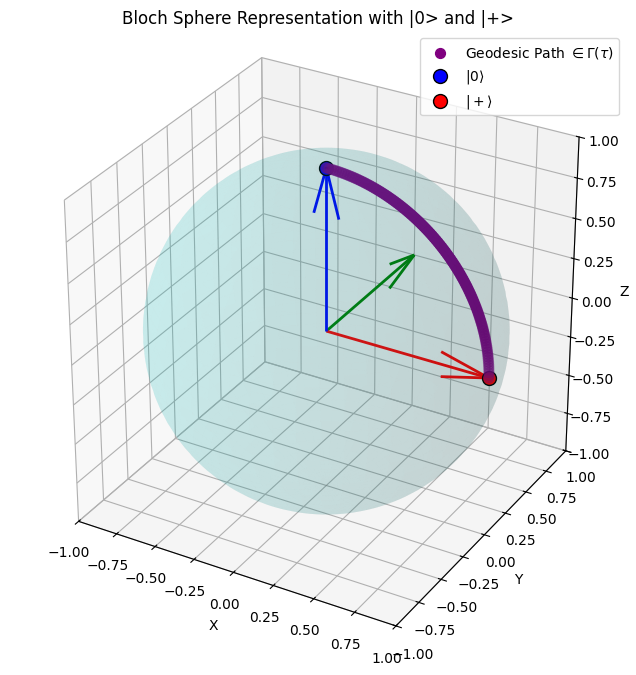

In [636]:
import matplotlib.pyplot as plt
# Define basis states
ket_zero = np.array([1, 0])  # |0>
ket_plus = np.array([1, 1]) / np.sqrt(2)  # |+>

# Convert quantum states to Bloch sphere coordinates
def bloch_coords(state):
    alpha, beta = state
    x = 2 * np.real(np.conj(alpha) * beta)
    y = 2 * np.imag(np.conj(alpha) * beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2
    return np.array([x, y, z])

# Compute Bloch vectors for geodesic states
bloch_vectors = np.array([bloch_coords(state) for state in geodesic_zero_plus_curve])

# Bloch vectors for |0> and |+>
k0_bloch = bloch_coords(ket_zero)
kplus_bloch = bloch_coords(ket_plus)

# Plot the Bloch Sphere
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
X = np.outer(np.cos(u), np.sin(v))
Y = np.outer(np.sin(u), np.sin(v))
Z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(X, Y, Z, color='c', alpha=0.1)

# Draw axes
ax.quiver(0, 0, 0, 1, 0, 0, color='r', linewidth=2)  # x-axis (red)
ax.quiver(0, 0, 0, 0, 1, 0, color='g', linewidth=2)  # y-axis (green)
ax.quiver(0, 0, 0, 0, 0, 1, color='b', linewidth=2)  # z-axis (blue)

# Plot Bloch vectors for geodesic
ax.scatter(bloch_vectors[:, 0], bloch_vectors[:, 1], bloch_vectors[:, 2], 
           color='purple', s=50, label=r'Geodesic Path $\in \Gamma(\tau)$')
# Plot |0> and |+>
ax.scatter(*k0_bloch, color='blue', s=100, label=r'$|0\rangle$', edgecolors='black')
ax.scatter(*kplus_bloch, color='red', s=100, label=r'$|+\rangle$', edgecolors='black')


# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Bloch Sphere Representation with |0> and |+>')

# Set aspect ratio and limits
ax.set_box_aspect([1, 1, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Show the legend
plt.legend()
plt.show()


In [637]:
print(geo_distance_zero_plus_FS )

0.7853981633974484


In [648]:
ket_state = states_opt_0[1]
print(f'Geodesic total length betweem |00> and |00> + |11>: {geo_distance_zerozero_bell_FS}')

#distances between the geodesic points and the |+0> state
distances_mid_geo_2qubit = [distance_FB(Gamma_tau_start, ket_state) for Gamma_tau_start in geodesic_zerozero_bell_curve]


# Convertir a numpy array solo por optimizarlo
arr = np.array(distances_mid_geo_2qubit)

# Encontrar el valor máximo, mínimo y sus índices
max_val = np.max(arr)
max_index = np.argmax(arr)

min_val = np.min(arr)
min_index = np.argmin(arr)

print(f"Valor máximo: {max_val}, Índice: {max_index}")
print(f"Valor mínimo: {min_val}, Índice: {min_index}")
print(f'valor distancia circuito: {min_val + max_val}')

Geodesic total length betweem |00> and |00> + |11>: 0.7853981633974484
Valor máximo: nan, Índice: 0
Valor mínimo: nan, Índice: 0
valor distancia circuito: nan


C:\Users\acer_\AppData\Local\Temp\ipykernel_43348\2682349668.py:18: RuntimeWarning: invalid value encountered in sqrt
  d_FS = np.sqrt(2 - 2 * abs_inner_product)


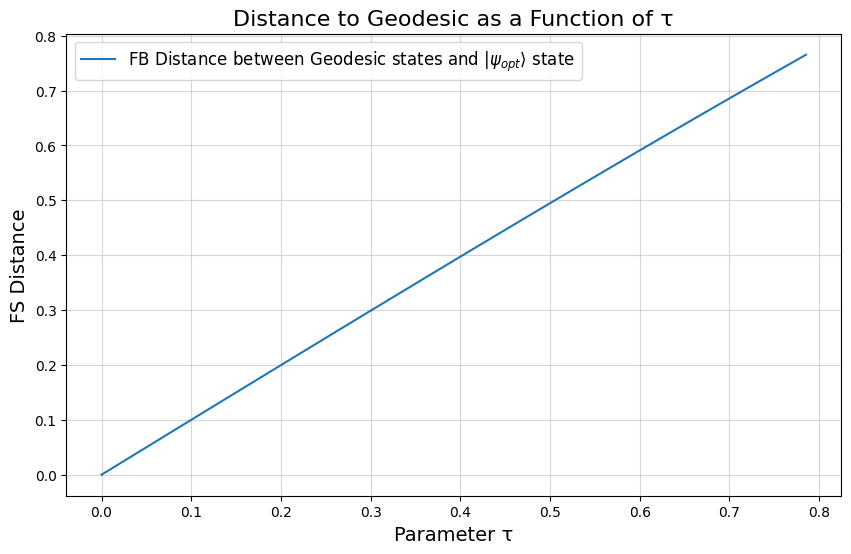

In [647]:
import matplotlib.pyplot as plt

# Plot the distances with respect to the geodesic
plt.figure(figsize=(10, 6))
plt.plot(tau_values_zerozero_bell_FS, distances_mid_geo_2qubit, label=r'FB Distance between Geodesic states and $|\psi_{opt} \rangle$ state')

# Add labels and title
plt.xlabel('Parameter τ', fontsize=14)
plt.ylabel('FS Distance', fontsize=14)
plt.title('Distance to Geodesic as a Function of τ', fontsize=16)

# Add grid and legend
plt.grid(alpha=0.5)
plt.legend(fontsize=12)

# Show the plot
plt.show()

In [651]:
distance_FB(geodesic_zerozero_bell_curve[0],states_opt_0[1])

C:\Users\acer_\AppData\Local\Temp\ipykernel_43348\2682349668.py:18: RuntimeWarning: invalid value encountered in sqrt
  d_FS = np.sqrt(2 - 2 * abs_inner_product)


np.float64(nan)

In [653]:
np.vdot(geodesic_zerozero_bell_curve[0],states_opt_0[1])

np.complex128(0.7071067811865477+0.7071067811865476j)